# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 5 - Random Walk

In [131]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Random Walk

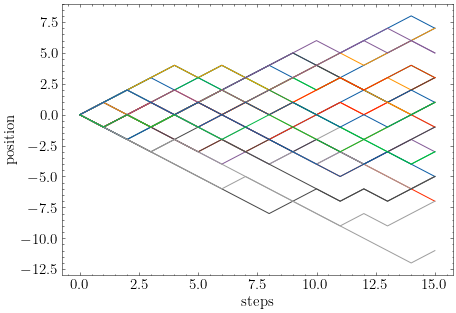

In [132]:
np.random.seed(0) # For reproducibility

N = 15 # steps
M = 30 # walkers
p = 0.5 # probability
a = 1.0 # step size

x = np.zeros((N+1, M))

for m in range(M):
    for n in range(N):
        if np.random.rand() >= p:
            x[n+1, m] = x[n, m] + a
        else:
            x[n+1, m] = x[n, m] - a
            
# Plotting

plt.plot(x)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

In [133]:
# Making it a function

def random_walk_1d(N, M, p=0.5, a=1.0):
    x = np.zeros((N+1, M))

    for m in range(M):
        for n in range(N):
            if np.random.rand() >= p:
                x[n+1, m] = x[n, m] + a
            else:
                x[n+1, m] = x[n, m] - a
    
    return x[-1,:]

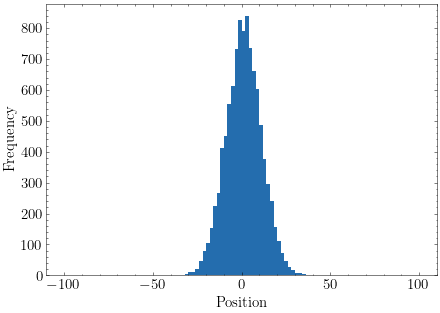

In [134]:
# Plotting the distribution

N = 100
M = 10000
p = 0.5
q = 1-p

m_values = [m for m in np.arange(-N, N+1, 1) if m%2 == 0]
x = random_walk_1d(N, M, p, a=1.0)

plt.hist(x, bins=m_values, alpha=0.9)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

In [135]:
# Binomial distribution

def binomial(N, m, p=0.5):
    q = 1-p
    n1 = 0.5*(N+m)
    n2 = 0.5*(N-m)
    omega = (factorial(N))/(factorial(n1)*factorial(n2))
    return omega*(p**n1)*(q**n2)

m_values = [m for m in np.arange(-N, N+1, 1) if m%2 == 0]
P = np.array([binomial(N, m) for m in m_values])

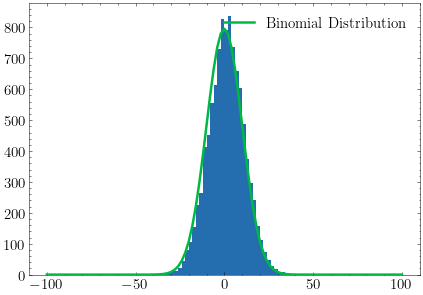

In [136]:
plt.hist(x, bins=m_values, alpha=0.9)
plt.plot(m_values, M*P, lw=2.5, label='Binomial Distribution')
plt.legend()
plt.show()

In [137]:
# Getting some statistics

x_mean = x.mean()
x_mean_exact = N*(p-q)

x2_mean = (x**2).mean()
x2_mean_exact = 0.0

variance = x2_mean - x_mean**2 # same as x.var()
variance_exact = 4*N*p*q

print(f'Mean: {x_mean} (expecting {x_mean_exact})')
print(f'Variance: {variance} (expecting {variance_exact})')

Mean: 0.161 (expecting 0.0)
Variance: 100.13047900000001 (expecting 100.0)


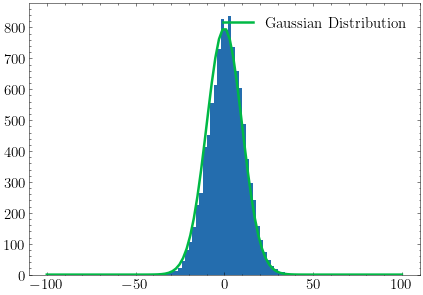

In [138]:
# Plotting a gaussian distribution

def gaussian_distribution(x, mu, sigma, C):
    norm = C/np.sqrt(2*np.pi*(sigma**2))
    return norm*np.exp(-((x - mu)**2)/(2*(sigma**2)))


t = np.linspace(-100, 100, 100)
plt.hist(x, bins=m_values, alpha=0.9)
plt.plot(t, gaussian_distribution(t, 0, 10, 2*M), lw=2.5, label='Gaussian Distribution')
plt.legend()
plt.show()



In [139]:
# Make a plot of mean and variance as a function of M

N = 20
M_values = np.array([1000, 5000, 10000, 15000, 100000, 150000])
mean_list = []
var_list = []

for M in M_values:
    x = random_walk_1d(N, M, p, a=1.0)
    mean_list.append(x.mean())
    var_list.append(x.var())

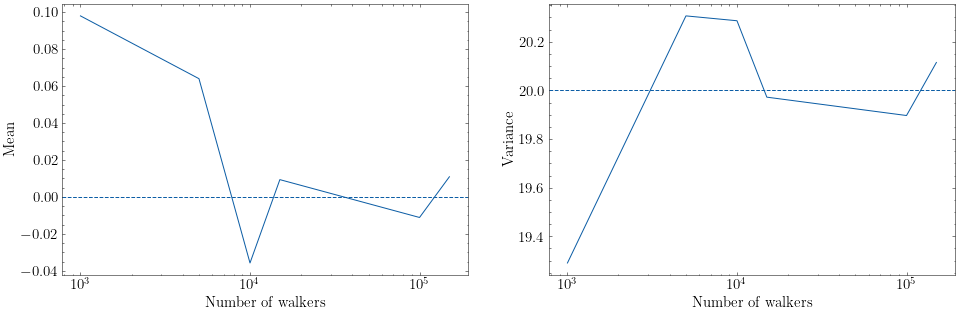

In [140]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(M_values, mean_list)
plt.xscale('log')
plt.axhline(y=0.0, ls='--')
plt.xlabel('Number of walkers')
plt.ylabel('Mean')

plt.subplot(1,2,2)
plt.plot(M_values, var_list)
plt.xscale('log')
plt.axhline(y=20.0, ls='--')
plt.xlabel('Number of walkers')
plt.ylabel('Variance')

plt.show()

# 2D Random Walk

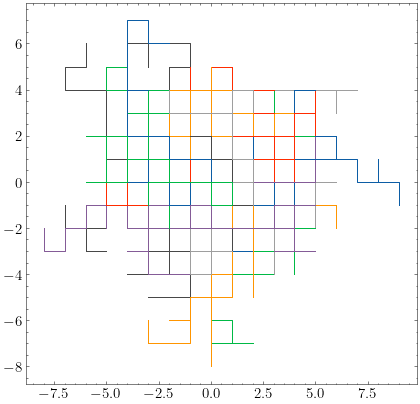

In [141]:
N = 20
M = 100
xy = np.zeros((N+1, M, 2))


for m in range(M):
    x = 0.0
    y = 0.0
    for n in range(N):    
        k = np.random.random()
        if k < 0.25:
            x = x + 1.0
        elif 0.25 < k < 0.5:
            x = x - 1.0
        elif 0.5 < k < 0.75:
            y = y + 1.0
        else:
            y = y - 1.0
        xy[n+1, m] = x, y
    
plt.figure(figsize=(7,7))
plt.plot(xy[:,:,0], xy[:,:,1])
plt.show()

In [142]:
def random_walk_2d(N, M):
    xy = np.zeros((N+1, M, 2))

    for m in range(M):
        x = 0.0
        y = 0.0
        for n in range(N):    
            k = np.random.random()
            if k < 0.25:
                x = x + 1.0
            elif 0.25 < k < 0.5:
                x = x - 1.0
            elif 0.5 < k < 0.75:
                y = y + 1.0
            else:
                y = y - 1.0
            xy[n+1, m] = x, y
    return xy

In [143]:
# Getting some statistics (N=20)

N = 20
M = 10000

xy = random_walk_2d(N,M)

x_mean = np.mean(xy[-1,:,0])
y_mean = np.mean(xy[-1,:,1])

print(f"<x> = {x_mean}, <y> = {y_mean}")

x2_mean = np.mean(xy[-1,:,0]**2)
y2_mean = np.mean(xy[-1,:,1]**2)

print(f"<x^2> = {x_mean}, <y^2> = {y_mean}")

r2 = x2_mean - x_mean**2 + y2_mean - y_mean**2
print(f"R^2 = {r2}")

<x> = -0.0075, <y> = 0.0263
<x^2> = -0.0075, <y^2> = 0.0263
R^2 = 20.12785206


In [144]:
# R as a function of N

M = 10000
N_values = (8, 16, 32, 64, 128, 256)
r2_list = []

for N in N_values:    
    xy = random_walk_2d(N,M)
    r2 = xy[-1,:,0].var() + xy[-1,:,1].var()
    r2_list.append(r2)

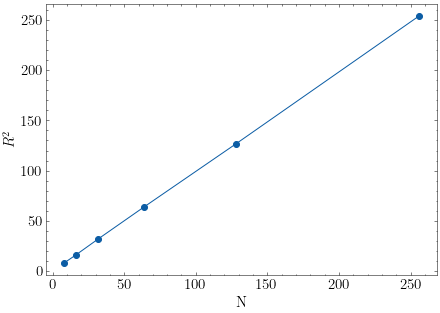

In [145]:
plt.plot(N_values, r2_list, marker='o')
plt.xlabel('N')
plt.ylabel('$R^2$')
plt.show()

In [146]:
# Getting diffusion coefficient
D = r2/(4*N)
print(D)

0.24807514224609375


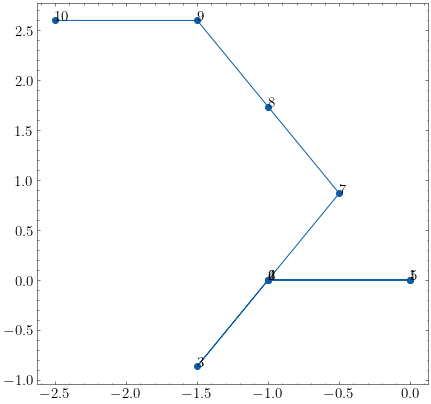

In [147]:
# Random walk in a triangular lattice

N = 10

x = 0.0
y = 0.0

xy = []

for i in range(N):
    xy.append([x, y])
    n = np.random.randint(0,5)
    x = x + np.cos(n*np.pi/3)
    y = y + np.sin(n*np.pi/3)

xy = np.array(xy)
plt.figure(figsize=(7,7))
plt.plot(xy[:, 0], xy[:, 1], marker='o')

# Numbering

for i in range(N):
    plt.text(xy[i,0], xy[i,1], str(i+1))

plt.show()

In [148]:
# Packing into a function and generalizing for M walkers

def random_walk_triangular(N, M):
    x = 0.0
    y = 0.0

    xy_list = []
    
    for i in range(M):
        xy = []
        x = 0.0
        y = 0.0
        
        for j in range(N):
            xy.append([x, y])
            n = np.random.randint(0,5)
            x = x + np.cos(n*np.pi/3)
            y = y + np.sin(n*np.pi/3)
        xy_list.append(xy)
    
    return np.array(xy_list)

N = 20
M = 50

xy = random_walk_triangular(N, M)

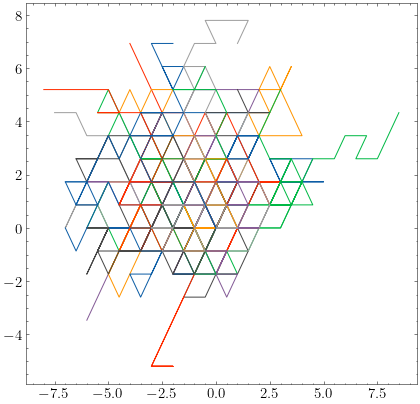

In [149]:
plt.figure(figsize=(7,7))

for i in range(M):
    plt.plot(xy[i,:,0], xy[i,:,1])
plt.show()

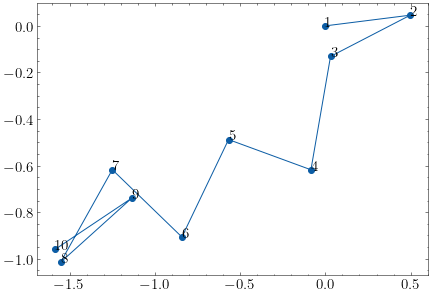

In [150]:
# Random walk in a 2d Continuous

N = 10
a = 0.5

x = 0.0
y = 0.0

xy = []

for i in range(N):
    xy.append([x, y])
    theta = np.random.rand()*2*np.pi
    x = x + a*np.cos(theta)
    y = y + a*np.sin(theta)

xy = np.array(xy)
plt.plot(xy[:, 0], xy[:, 1], marker='o')

# Numbering
for i in range(N):
    plt.text(xy[i,0], xy[i,1], str(i+1))

plt.show()

In [151]:
# Packing into a function and generalizing for M walkers

def random_walk_continuous(N, M, a=1.0):
    x = 0.0
    y = 0.0

    xy_list = []
    
    for i in range(M):
        xy = []
        x = 0.0
        y = 0.0
        
        for j in range(N):
            xy.append([x, y])
            theta = np.random.rand()*2*np.pi
            x = x + a*np.cos(theta)
            y = y + a*np.sin(theta)
        xy_list.append(xy)
    
    return np.array(xy_list)

N = 20
M = 50

xy = random_walk_continuous(N, M)

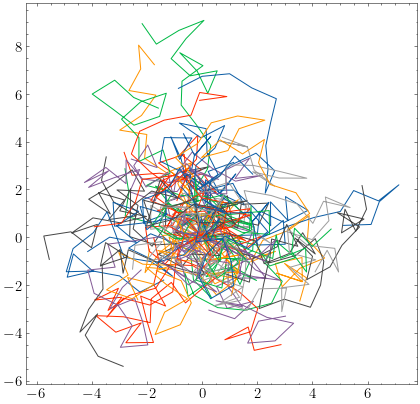

In [152]:
plt.figure(figsize=(7,7))

for i in range(M):
    plt.plot(xy[i,:,0], xy[i,:,1])
plt.show()